<a href="https://colab.research.google.com/github/jin-raii/Handwritten-digits-using-Deep-Learning/blob/main/momo_and_chowmein_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow
from keras.models import Sequential
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
dataset_path = '/content/drive/MyDrive/dataset'
folders = ['train/momo', 'train/chowmein', 'test/momo', 'test/chowmein']

In [ ]:
def resize_img(folder):
    image_count = 0

    for img_name in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skipping: {img_name} (Unreadable)")
                continue

            img = cv2.resize(img, (150, 150))  # Resize to 150x150
            cv2.imwrite(img_path, img)
            image_count += 1
        except Exception as e:
            print(f"Error resizing {img_name}: {e}")

    print(f"Resized {image_count} images in {folder}")


In [ ]:
for folder in folders:
  resize_img(os.path.join(dataset_path, folder))

100%|██████████| 174/174 [00:03<00:00, 51.83it/s]


Resized 174 images in /content/drive/MyDrive/dataset/train/momo


100%|██████████| 174/174 [00:03<00:00, 50.93it/s]


Skipping: .ipynb_checkpoints (Unreadable)
Resized 173 images in /content/drive/MyDrive/dataset/train/chowmein


100%|██████████| 11/11 [00:00<00:00, 60.14it/s]


Resized 11 images in /content/drive/MyDrive/dataset/test/momo


100%|██████████| 11/11 [00:00<00:00, 49.86it/s]

Resized 11 images in /content/drive/MyDrive/dataset/test/chowmein


### Plot resized image


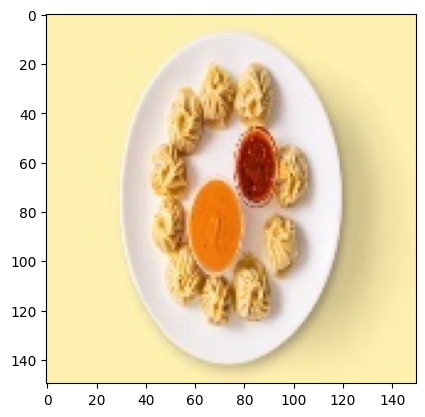

In [ ]:
img_path = '/content/drive/MyDrive/dataset/train/momo/momo_1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Load Images using ImageDataGenerator
 - Loads images from dir in batch size instead of one by one
 - allows to rotate, zoom and flip
 - automatically labels images based on folder name e.g  Images in /train/momo are labeled as 'momo'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Define path for train and test dataset

In [ ]:
train_path = dataset_path + '/train'
test_path = dataset_path  + '/test'
train_path

'/content/drive/MyDrive/dataset/train'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# load train data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150), # img size
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

# load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150), # img size
    batch_size=32,
    class_mode='categorical'
)

Found 347 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


class labels

In [ ]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1}

### Visualize Images

In [ ]:
import matplotlib.pyplot as plt


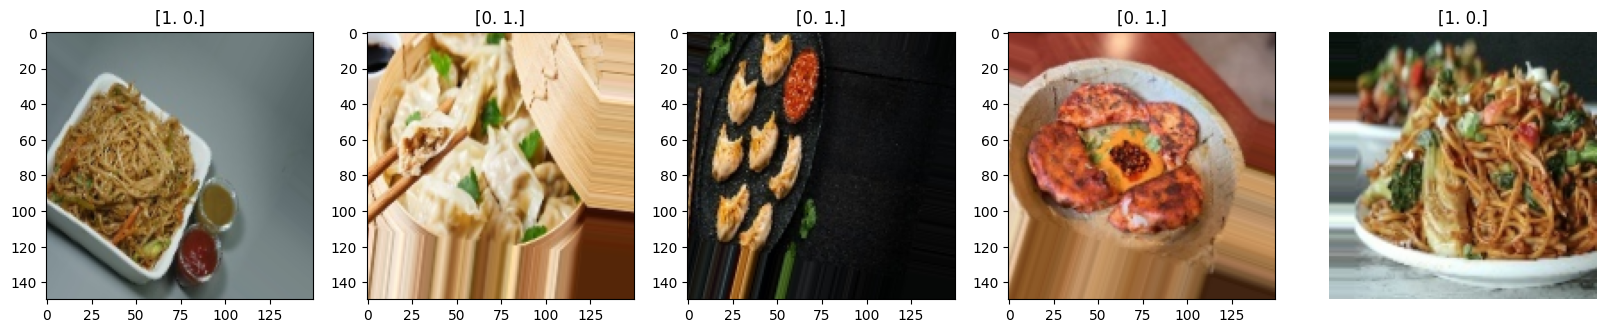

In [ ]:
img, labels = next(train_generator)
fig, axis = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  axis[i].imshow(img[i])
  axis[i].set_title(labels[i])
plt.axis('off')
plt.show()

### Build CNN model for classification using simple model architecture

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = models.Sequential([
    # extract features from images
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(units=100, activation='relu'),
    layers.Dropout(0.2), # ignore some neuron while training
    layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=10)
mcp_save = ModelCheckpoint('/content/drive/MyDrive/model.weights.h5', save_best_only=True, monitor='val_loss')

history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[earlyStopping, mcp_save])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4827 - loss: 1.8842

11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4884 - loss: 1.8337 - val_accuracy: 0.5909 - val_loss: 0.6235
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7429 - loss: 0.5564

11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7439 - loss: 0.5554 - val_accuracy: 0.7727 - val_loss: 0.5420
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7568 - loss: 0.4801

11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7578 - loss: 0.4812 - val_accuracy: 0.6818 - val_loss: 0.4867
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7687 - loss: 0.4566

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7707 - loss: 0.4561 - val_accuracy: 0.7727 - val_loss: 0.4582
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8609 - loss: 0.3514

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8597 - loss: 0.3522 - val_accuracy: 0.8636 - val_loss: 0.4074
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8859 - loss: 0.3298

11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8841 - loss: 0.3332 - val_accuracy: 0.8182 - val_loss: 0.3941
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8149 - loss: 0.4058 - val_accuracy: 0.6818 - val_loss: 0.4210
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8777 - loss: 0.3684

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8778 - loss: 0.3661 - val_accuracy: 0.8636 - val_loss: 0.3350
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8993 - loss: 0.2996 - val_accuracy: 0.7273 - val_loss: 0.4812
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8166 - loss: 0.4011 - val_accuracy: 0.9091 - val_loss: 0.3471
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8962 - loss: 0.3208 - val_accuracy: 0.9091 - val_loss: 0.3737
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9162 - loss: 0.2766 - val_accuracy: 0.7727 - val_loss: 0.3889
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9082 - loss: 0.2406 - val_accuracy: 0.8636 - val_loss: 0.3553
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8987 - loss: 0.2423 - val_accuracy: 0.7273 - val_loss: 0.4675
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9388 - loss: 0.2211 - val_accuracy: 0.7273 - val_los

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8772 - loss: 0.3206 - val_accuracy: 0.9091 - val_loss: 0.2887
Epoch 19/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8969 - loss: 0.2630 - val_accuracy: 0.9091 - val_loss: 0.3479
Epoch 20/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9333 - loss: 0.1933 - val_accuracy: 0.7727 - val_loss: 0.4375
Epoch 21/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9446 - loss: 0.1617 - val_accuracy: 0.8182 - val_loss: 0.4110
Epoch 22/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9472 - loss: 0.1678 - val_accuracy: 0.8636 - val_loss: 0.3974
Epoch 23/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9049 - loss: 0.2072 - val_accuracy: 0.8182 - val_loss: 0.2925
Epoch 24/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9272 - loss: 0.1594 - val_accuracy: 0.8182 - val_loss: 0.3975
Epoch 25/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9288 - loss: 0.1834

11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9307 - loss: 0.1810 - val_accuracy: 0.9091 - val_loss: 0.2813
Epoch 26/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9570 - loss: 0.1293 - val_accuracy: 0.9091 - val_loss: 0.3883
Epoch 27/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9447 - loss: 0.1905 - val_accuracy: 0.9091 - val_loss: 0.3285
Epoch 28/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9594 - loss: 0.1332 - val_accuracy: 0.8182 - val_loss: 0.3925
Epoch 29/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9578 - loss: 0.1071 - val_accuracy: 0.9091 - val_loss: 0.3012
Epoch 30/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9487 - loss: 0.1519 - val_accuracy: 0.8636 - val_loss: 0.3522
Epoch 31/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9219 - loss: 0.1909

11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.9227 - loss: 0.1899 - val_accuracy: 0.8636 - val_loss: 0.2680
Epoch 32/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9425 - loss: 0.1657 - val_accuracy: 0.8182 - val_loss: 0.3129
Epoch 33/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9176 - loss: 0.1651 - val_accuracy: 0.8182 - val_loss: 0.3878
Epoch 34/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9446 - loss: 0.1354 - val_accuracy: 0.9091 - val_loss: 0.3476
Epoch 35/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9684 - loss: 0.1116 - val_accuracy: 0.8182 - val_loss: 0.3675
Epoch 36/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9599 - loss: 0.1471 - val_accuracy: 0.8182 - val_loss: 0.3712
Epoch 37/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9518 - loss: 0.1213 - val_accuracy: 0.9091 - val_loss: 0.4405
Epoch 38/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9501 - loss: 0.1531 - val_accuracy: 0.8636 - val_lo

In [ ]:
y_pred = model.predict(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.8636 - loss: 0.3940


0.8636363744735718

### plot training history

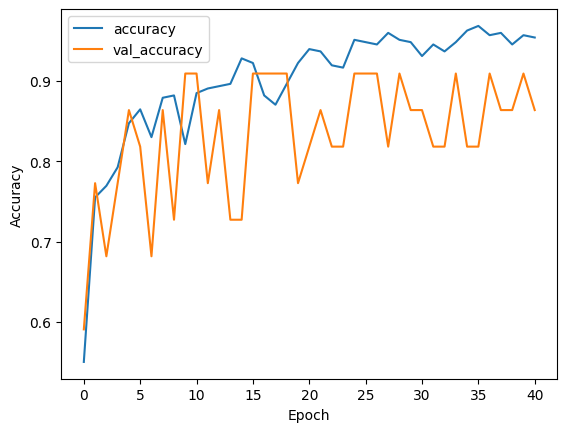

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Save Model for testing purpose still need to increase accuracy of model

In [ ]:
model.save(dataset_path + 'my_model.h5')

In [ ]:
my_model = models.load_model(dataset_path + 'my_model.h5')
my_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 147968)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │      14,796,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,890,352 (56.80 MB)

 Trainable params: 14,890,350 (56.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Load momo image from Drive

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

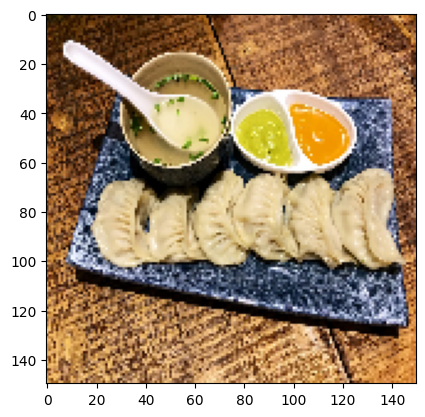

In [ ]:
momo_path = '/content/drive/MyDrive/dataset/momos.jpg'
momo_img = cv2.imread(momo_path)
momo_img = cv2.cvtColor(momo_img, cv2.COLOR_BGR2RGB)
momo_img = cv2.resize(momo_img, (150, 150))
momo_img = momo_img.astype('float32') / 255.0 # normalize
momo_img = img_to_array(momo_img) # convert img to array
momo_img = np.expand_dims(momo_img, axis=0) # add batch dimension
plt.imshow(momo_img[0])

In [ ]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1}

In [ ]:
momo_img[0].shape

(150, 150, 3)

In [ ]:
my_model.predict(momo_img[0])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 150, 3), dtype=float32). Expected shape (None, 150, 150, 3), but input has incompatible shape (32, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 150, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
def prepare_image(path):
    img = cv2.imread(path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (150, 150))  # Resize to 150x150
    img = img.astype("float32") / 255.0  # Normalize
    img = img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [ ]:
m_img = prepare_image('/content/drive/MyDrive/dataset/momos.jpg')

In [ ]:
my_model.predict(m_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


array([[0.0145264, 0.9854735]], dtype=float32)

In [ ]:
np.argmax(my_model.predict(m_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


np.int64(1)

In [ ]:
train_generator.class_indices

{'chowmein': 0, 'momo': 1}